# Imports

In [28]:
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import h5py, os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from progressBar import ProgressBar
from plotting_utilities import *

## Global Var Definitions

In [2]:
Mjj_selection = 1100.0
maxEvts = 1e7

# Function Definitions

In [3]:
def read_in_data( file_dir ):
    pb = ProgressBar(maxEvts)

    data = None
    flist = glob(file_dir + '/' + '*result.h5')
    #print(flist)
    i_file = 0
    labels = None
    for i_file, fname in enumerate(flist):
        f = h5py.File(fname, 'r')
        #print(f.keys())
        aux_evts = np.array(f.get('results'))
        aux_evts = aux_evts[aux_evts[:,0] > Mjj_selection]
        if data is None:
            labels = list(f.get('labels'))
            print('Labels:')
            print(labels)
            pb.show(0)
            data = aux_evts
        else:
            data = np.append(data, aux_evts, axis=0)

        pb.show(data.shape[0])
    
    # convert data to recarray
    dt = [(str(s), '<f4') for s in labels]
    data = np.array(list(zip(*data.T)), dtype=dt)


    print('\nnum files read in dir ', file_dir, ': ', i_file+1)
    return data 

In [39]:
def plot_hist( data, xlabel, ylabel, title, plotname='', legend=[], ylogscale=True ):
    fig = plt.figure( )
    plot_hist_on_axis( plt.gca(), data, xlabel, ylabel, title, legend, ylogscale )
    if legend:
        plt.legend()
    plt.tight_layout()
    fig.savefig('fig/' + plotname + '_hist.png')
    plt.show()
    plt.close()


def plot_hist_on_axis( ax, data, xlabel, ylabel, title, legend=[], ylogscale=True ):
    bin_num = 70
    alpha = 0.4
    histtype = 'stepfilled'
    if ylogscale:
        ax.set_yscale('log', nonposy='clip')
    for i, dat in enumerate(data):
        if i > 0:
            histtype = 'step'
            alpha = 1.0
        ax.hist( dat, bins=bin_num, normed=True, alpha=alpha, histtype=histtype, label=legend[i] )
    ax.set_ylabel( ylabel )
    ax.set_xlabel( xlabel )
    ax.set_title( title, fontsize=10 )
    ax.tick_params(axis='both', which='minor', labelsize=8)
    #ax.set_ylim(bottom=1e-7)

    
def plot_hist_2d( x, y, xlabel, ylabel, title, plotname=''):
    fig = plt.figure(figsize=(6, 6))
    ax = plt.gca()
    im = plot_hist_2d_on_axis( ax, x, y, xlabel, ylabel, title )
    fig.colorbar(im[3])
    plt.tight_layout()
    #fig.savefig('fig/' + plotname + '_hist_2d.png')
    plt.draw()
    #plt.close()

def plot_hist_2d_on_axis( ax, x, y, xlabel, ylabel, title ):
    im = ax.hist2d(x, y, bins=100, norm=colors.LogNorm())
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_ylim(top=1.)
    return im 

In [5]:
def computeDiscriminatingVar_sum(l1, l2):
    out = (l1+l2)
    return out

def computeDiscriminatingVar_min(l1, l2):
    out = np.minimum(l1,l2)
    return out

# Data Samples

In [17]:
base_dir = '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized' #'/afs/cern.ch/work/k/kiwoznia/vae_results' # /results_before_max_pixel

sample_loc = {'qcdSigExt': base_dir + '/qcd_sqrtshatTeV_13TeV_PU40_EXT',  #_ALL # _ext + _ext2
              'GtoWW1': base_dir + '/RSGraviton_WW_NARROW_13TeV_PU40_1.5TeV',
              'GtoWW2': base_dir + '/RSGraviton_WW_NARROW_13TeV_PU40_2.5TeV',
              #'GtoWW3': base_dir + '/RSGraviton_WW_NARROW_13TeV_PU40_3.5TeV',
              #'GtoWW4': base_dir + '/RSGraviton_WW_NARROW_13TeV_PU40_4.5TeV',
              'AtoHZ': base_dir + '/AtoHZ_to_ZZZ_13TeV_PU40/',
              'GtoTTBroad': base_dir + '/RSGraviton_tt_BROAD_13TeV_PU40',
              'GtoTTNarr': base_dir + '/RSGraviton_tt_NARROW_13TeV_PU40'
             }

sample_label = {'qcdSigExt':r'QCD signal',
                'GtoWW1':r'$G(1.5 TeV)\to WW$',
                'GtoWW2':r'$G(2.5 TeV)\to WW$',
                #'GtoWW3':r'$G(3.5 TeV)\to WW$',
                #'GtoWW4':r'$G(4.5 TeV)\to WW$',
                'AtoHZ':r'$A \to HZ \to ZZZ$',
                'GtoTTBroad':r'$G \to TT broad$',
                'GtoTTNarr':r'$G \to TT narrow$'
               }

In [18]:
# read in data
data = {}
for n, file_dir in sample_loc.iteritems():
    print(n)
    sample = read_in_data( file_dir )
    data[n] = sample

qcdSigExt
Labels:
['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
[##------------------]  12% - ETA: 24.4 min ('\nnum files read in dir ', '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/qcd_sqrtshatTeV_13TeV_PU40_EXT', ': ', 3903)
GtoTTNarr
Labels:
['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
[--------------------]  0%('\nnum files read in dir ', '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/RSGraviton_tt_NARROW_13TeV_PU40', ': ', 96)
AtoHZ
Labels:
['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
[--------------------]  0%('\nnum files read in dir '

# Plot Losses

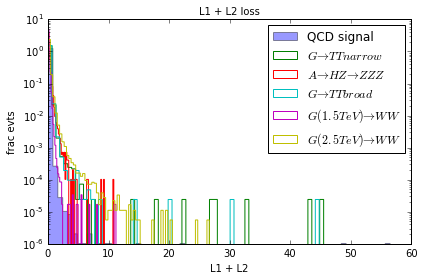

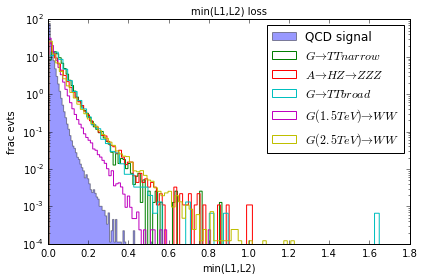

In [19]:
# plot L1 + L2 loss 1D distribution
losses_plus = []
for n, label in sample_label.iteritems():
    x = data[n]
    y = computeDiscriminatingVar_sum(x['j1TotalLoss'],x['j2TotalLoss'])
    losses_plus.append(y)
    
plot_hist( losses_plus, 'L1 + L2', 'frac evts', 'L1 + L2 loss', 'sum_j1j2_reco_loss', list(sample_label.values()))

# plot min(L1,L2) loss 1D distribution
losses_min = []
for n, label in sample_label.iteritems():
    x = data[n]
    y = computeDiscriminatingVar_min(x['j1TotalLoss'],x['j2TotalLoss'])
    losses_min.append(y)
    
plot_hist( losses_min, 'min(L1,L2)', 'frac evts', 'min(L1,L2) loss', 'sum_j1j2_reco_loss', list(sample_label.values()))

# Plot Losses vs Mass

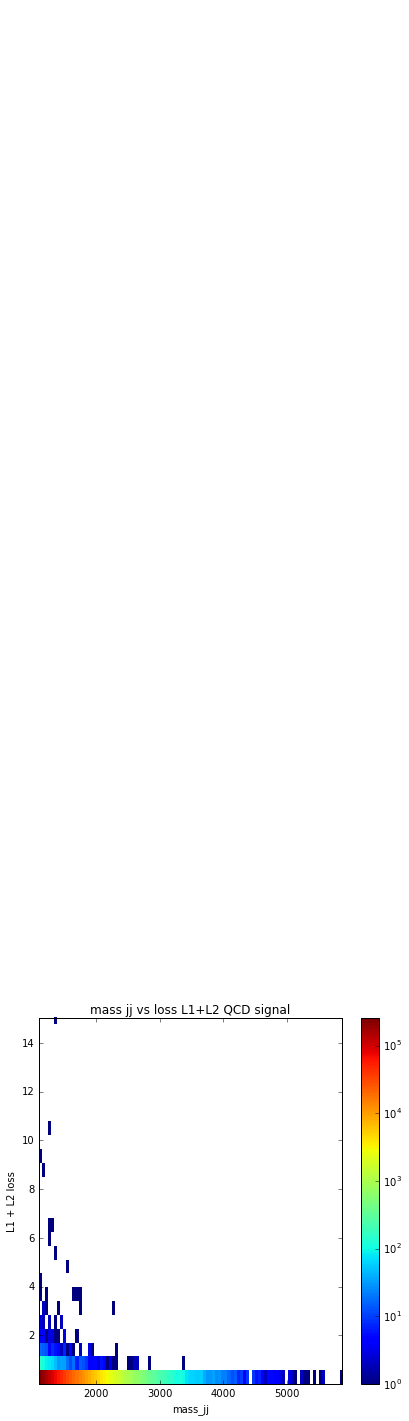

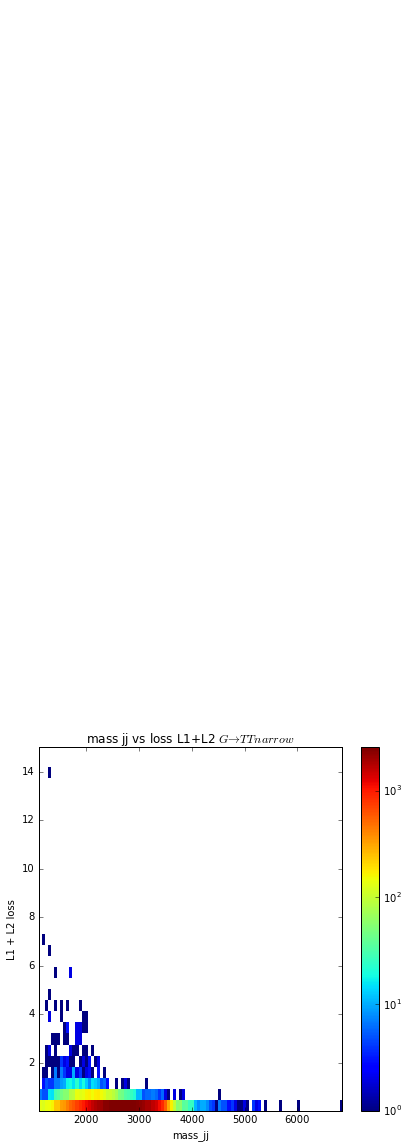

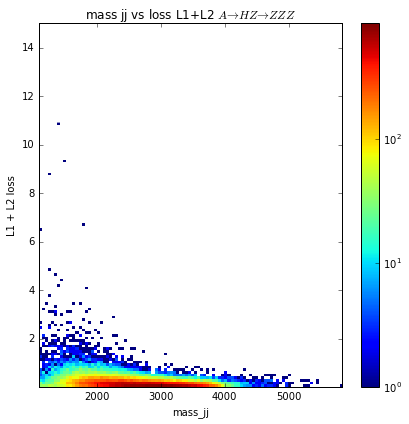

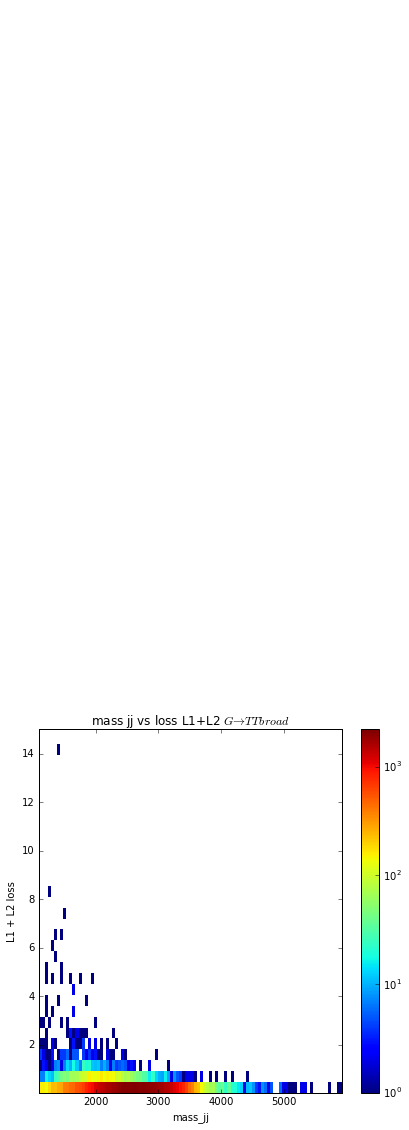

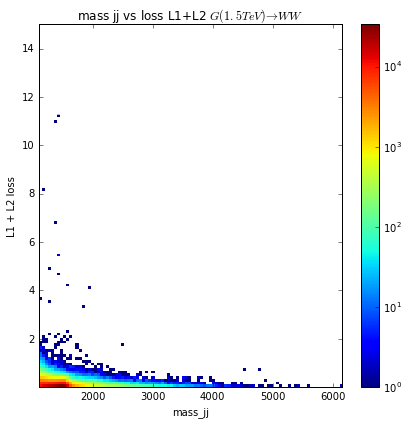

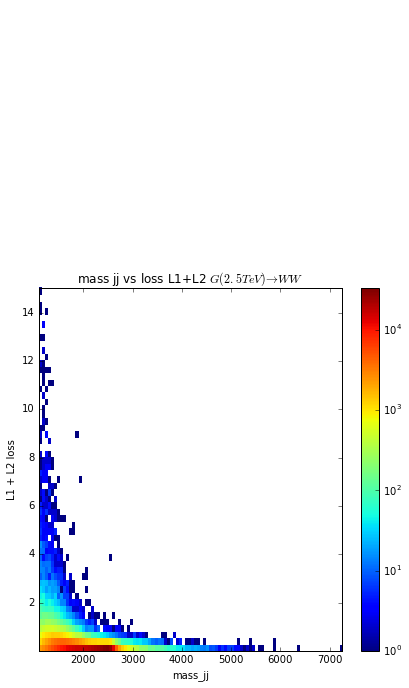

In [35]:
# plot L1 + L2 vs mass
for i, (n, label) in enumerate(sample_label.iteritems()):
    x = data[n]
    loss = losses_plus[i]
    plot_hist_2d(x['mJJ'],loss,'mass_jj','L1 + L2 loss', 'mass jj vs loss L1+L2 ' + label)
    

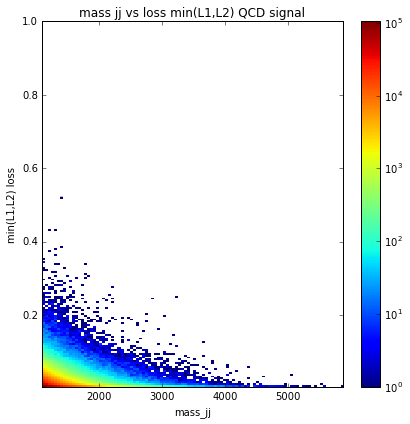

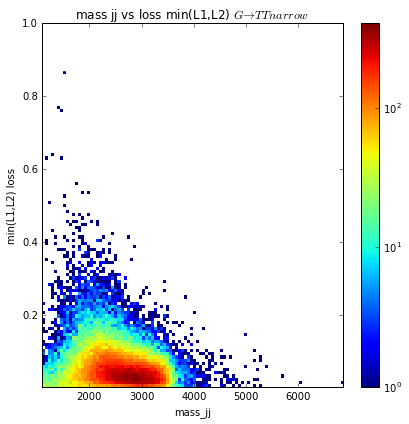

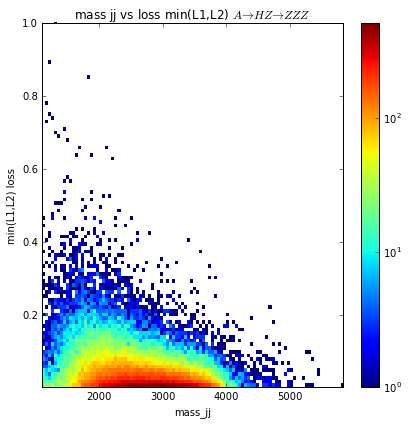

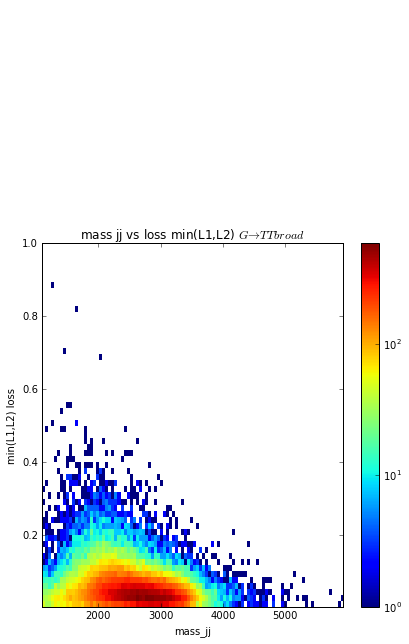

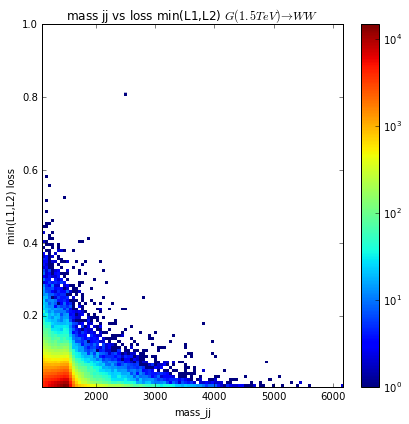

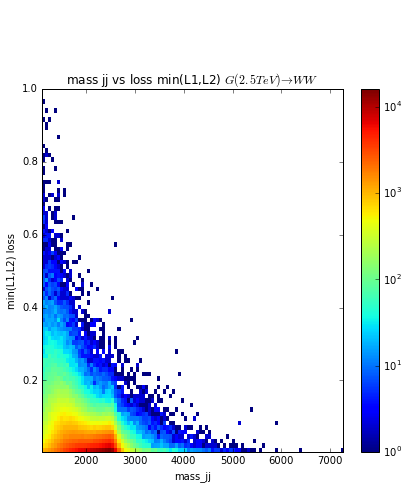

In [40]:
# plot min(L1,L2) vs mass
for i, (n, label) in enumerate(sample_label.iteritems()):
    x = data[n]
    loss = losses_min[i]
    plot_hist_2d(x['mJJ'],loss,'mass_jj','min(L1,L2) loss', 'mass jj vs loss min(L1,L2) ' + label)
    

## Plot Losses vs pt

In [ ]:
# plot jet 1: pt vs loss
for i, (n, label) in enumerate(sample_label.iteritems()):
    x = data[n]
    plot_hist_2d(x['j1Pt'],x['j1TotalLoss'],'j1 pt','L1', 'pt j1 vs loss L1 ' + label)
    

In [ ]:
# plot jet 2: pt vs loss
for i, (n, label) in enumerate(sample_label.iteritems()):
    x = data[n]
    plot_hist_2d(x['j2Pt'],x['j2TotalLoss'],'j2 pt','L2', 'pt j2 vs loss L2 ' + label)
    